1.读取data中2023_6文件夹中的openrank数据集，分析美国排名前一百的项目的的value的最大值、最小值、均值以及中位数。

In [ ]:
import pandas as pd

def analyze_openrank_data(file_path):
    try:
        # 读取CSV文件
        data = pd.read_csv(file_path)

        # 计算value的最大值、最小值、均值和中位数
        max_value = data['value'].max()
        min_value = data['value'].min()
        mean_value = data['value'].mean()
        median_value = data['value'].median()

        return {
            '最大值': max_value,
            '最小值': min_value,
            '均值': mean_value,
            '中位数': median_value
        }
    except FileNotFoundError:
        print(f"文件未找到: {file_path}")
        return None
    except KeyError as e:
        print(f"数据中缺少必要的列: {e}")
        return None

file_name = "D:\\Git-sub\\ItDSaE\\hw6_open_rank_20236.csv"

result = analyze_openrank_data(file_name)
if result:
    for key, value in result.items():
        print(f"{key}: {value}")

最大值: 1394.45
最小值: 200.68
均值: 346.9679
中位数: 273.66999999999996


2.读取data中2022文件夹下的activity_2020(2022)文件，分析美国排名前十的项目的平均增长率。

In [5]:
import pandas as pd
import numpy as np

def calculate_average_growth_rate(file_path):
    try:
        # 读取CSV文件
        data = pd.read_csv(file_path)
        data['growth_rate'] = 0
        for i in range(2,13):
            data['growth_rate'] += (data.iloc[:,i] - data.iloc[:,i-1]) / data.iloc[:,i]
        average_growth_rate = np.nanmean(data['growth_rate']/11)
        
        return average_growth_rate
    except FileNotFoundError:
        print(f"文件未找到: {file_path}")
        return None
    except KeyError as e:
        print(e)
        return None

# 文件路径
file_path = "D:\\Git-sub\\ItDSaE\\hw6_activity_2022.csv"

# 调用函数并打印结果
average_growth_rate = calculate_average_growth_rate(file_path)
if average_growth_rate is not None:
    print(f"项目的平均增长率为: {average_growth_rate}")

项目的平均增长率为: -0.027880793298390383


3.data/2022/china_2022.csv表示中国开源领域排名前十的企业。data/2022/global_2022.csv表示开源领域全球前十的的企业，请通过各种统计指标比较两者的各种数据差异。

In [14]:
import pandas as pd

# 加载数据
china_data = pd.read_csv('D:\\Git-sub\\ItDSaE\\hw6_china_2022.csv')
global_data = pd.read_csv('D:\\Git-sub\\ItDSaE\\hw6_global_2022.csv')

# 选择数值列进行计算
columns = china_data.columns.tolist()
columns.remove("name")
columns.remove("rank")
columns.remove("rankDelta")
columns.remove("valueDelta")
               

# 计算每列的最大值、最小值、平均值、中位数
def calculate_statistics(data, columns):
    stats = {}
    
    for col in columns:
        stats[col] = {
            'Max': data[col].max(),
            'Min': data[col].min(),
            'Mean': data[col].mean(),
            'Median': data[col].median()
        }
    
    return stats

# 计算中国企业和全球企业的统计指标
china_stats = calculate_statistics(china_data, columns)
global_stats = calculate_statistics(global_data, columns)

china_rankDelta_variance = china_data['rankDelta'].var()  # 计算中国rankDelta的方差
global_rankDelta_variance = global_data['rankDelta'].var()  # 计算全球rankDelta的方差
china_valueDelta_variance = china_data['valueDelta'].var()  
global_valueDelta_variance = global_data['valueDelta'].var()
print("中国rankDelta的方差:", china_rankDelta_variance)
print("全球rankDelta的方差:", global_rankDelta_variance)
print("中国valueDelta的方差:", china_valueDelta_variance)
print("全球valueDelta的方差:", global_valueDelta_variance)

# 将计算结果转换为 DataFrame
china_stats_df = pd.DataFrame(china_stats)
global_stats_df = pd.DataFrame(global_stats)


# 合并两者的结果到一个表格中
comparison_df = pd.concat([china_stats_df, global_stats_df], axis=1, keys=['China', 'Global'])

# 输出结果
print(comparison_df)

# 如果需要保存为 CSV 文件
comparison_df.to_csv('D:\\Git-sub\\ItDSaE\\hw6_comparison.csv')


中国rankDelta的方差: 98.89999999999999
全球rankDelta的方差: 0.9888888888888892
中国valueDelta的方差: 28385708.61026778
全球valueDelta的方差: 691103957.2300988
               China                                                  \
       issue_comment open_issue open_pull review_comment merged_pull   
Max         167814.0    22397.0   35266.0        60402.0     26732.0   
Min          11741.0      752.0    1823.0         2113.0      1165.0   
Mean         61205.5     9169.2   16912.7        19857.5     13764.1   
Median       39141.0     6889.5   15953.0        10851.0     13705.5   

                          Global                                      \
             value issue_comment open_issue open_pull review_comment   
Max     103368.490     1437317.0   189185.0  309685.0       456166.0   
Min      12033.710       78530.0    13162.0   27414.0        35072.0   
Mean     40269.534      341409.4    43300.2   83423.0       120392.1   
Median   29789.235      178629.0    21648.0   49103.5        70433.5

4.贝叶斯定理
根据 OpenLeaderboard 上对前 10000 个活跃的项目统计，工具组件型项目占比 50 %，系统应用型占比 25 %，而内容资源型（非软件类）项目占比 25 %，成三分天下的态势。

非软件类项目中，带有 HTML/Markdown 标签的项目占 85 %，而软件类项目中带 HTML/Markdown标签的项目占比则为 10 %（注：HTML/Markdown 一般可用来书写文档内容）

工具组件型项目中，JavaScript 语言的项目占比 35 %，而非工具组件型项目中， JavaScript 语言的项目占比则为 10 %（注：JavaScript 是一种脚本编程语言，可以在网页上实现复杂的功能）

已知一个项目带有 HTML/Markdown 标签，那么该项目是非软件型项目的概率是多少？

In [15]:
htmlmark=0.85 * 0.25/(0.75*0.1+0.25*0.85)
print(htmlmark)

0.7391304347826088


5.接上文，已知一个项目是由 JavaScript 语言编写的，那么它是工具组件型项目的概率是多少？

In [16]:
javamark=0.35*0.5/(0.35*0.5+0.1*0.5)
print(javamark)

0.7777777777777778


6.根据以下数据建立可视化无向图

user = [1, 2, 3, 4]

edge = [(1, 2), (2, 3), (3, 4), (4, 1)]

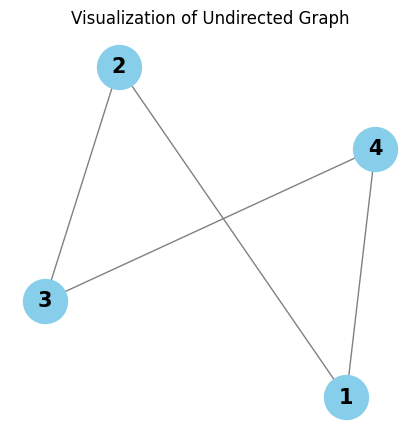

In [21]:
import networkx as nx
import matplotlib.pyplot as plt

# 用户列表
user = [1, 2, 3, 4]

# 边列表
edge = [(1, 2), (2, 3), (3, 4), (4, 1)]

# 创建一个无向图
G = nx.Graph()

# 添加节点
G.add_nodes_from(user)

# 添加边
G.add_edges_from(edge)

# 绘制图形
plt.figure(figsize=(4, 4))  # 设置画布大小
nx.draw(G, with_labels=True, node_color='skyblue', node_size=1000, font_size=15, font_weight='bold', edge_color='gray')
plt.title("Visualization of Undirected Graph")
plt.show()


7.根据以下数据建立可视化有向图

users = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

edges = [(0, 1), (1, 0), (0, 2), (2, 0), (1, 2), (2, 1), (1, 3), (2, 3), (3, 4), (5, 4), (5, 6), (7, 5), (6, 8), (8, 7), (8, 9)]

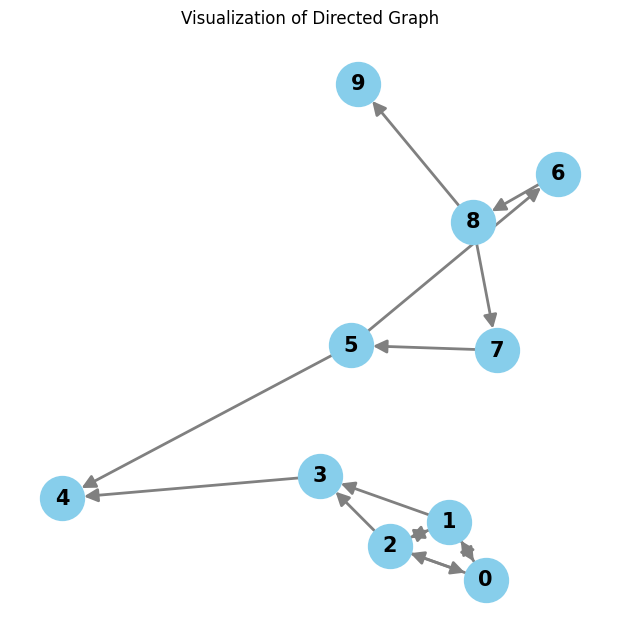

In [23]:
import networkx as nx
import matplotlib.pyplot as plt

# 用户列表
users = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

# 边列表（有向边）
edges = [(0, 1), (1, 0), (0, 2), (2, 0), (1, 2), (2, 1), 
         (1, 3), (2, 3), (3, 4), (5, 4), (5, 6), (7, 5), 
         (6, 8), (8, 7), (8, 9)]

# 创建一个有向图
G = nx.DiGraph()

# 添加节点
G.add_nodes_from(users)

# 添加边
G.add_edges_from(edges)

# 绘制有向图
plt.figure(figsize=(6, 6))  # 设置画布大小
nx.draw(G, with_labels=True, node_color='skyblue', node_size=1000, 
        font_size=15, font_weight='bold', edge_color='gray', 
        arrowsize=20, arrowstyle='-|>', width=2)

plt.title("Visualization of Directed Graph")
plt.show()


8.针对第七题构建的有向图，计算并输出每个节点的pagerank值。同时根据pagerank调整可视化图的大小，使得PageRank越大的节点在可视化结果中也越大。

PageRank Values:
Node 0: 0.09499069584253748
Node 1: 0.10547659652084884
Node 2: 0.10547659652084884
Node 3: 0.09499069584253748
Node 4: 0.15931683334639937
Node 5: 0.1020112395832942
Node 6: 0.0785753675867465
Node 7: 0.0785753675867465
Node 8: 0.1020112395832942
Node 9: 0.0785753675867465


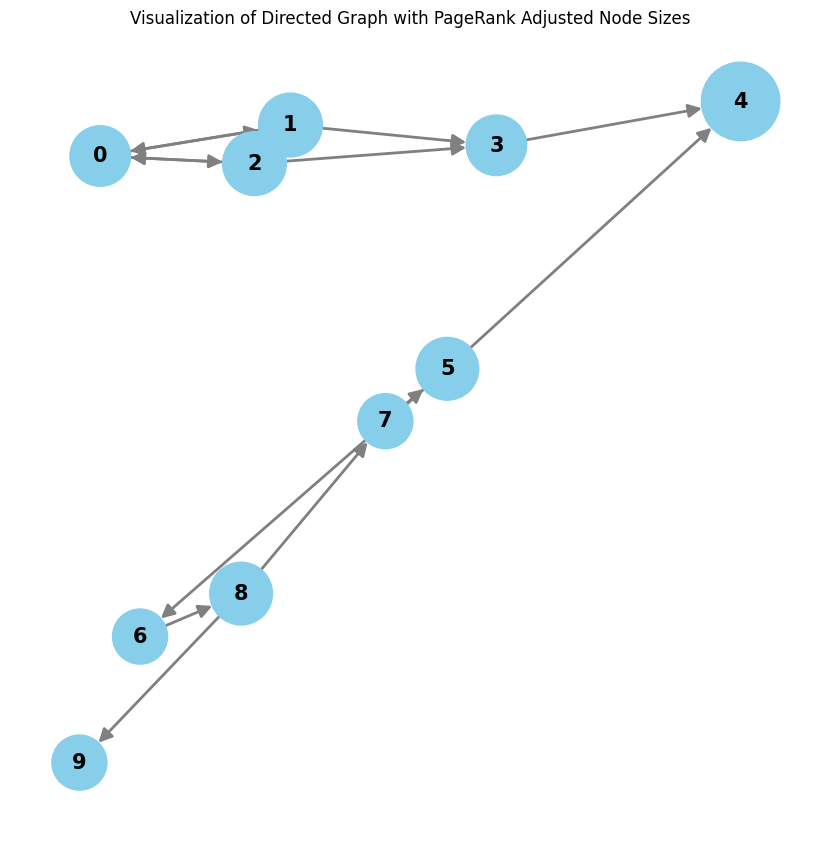

In [26]:
import networkx as nx
import matplotlib.pyplot as plt

# 用户列表
users = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

# 边列表（有向边）
edges = [(0, 1), (1, 0), (0, 2), (2, 0), (1, 2), (2, 1), 
         (1, 3), (2, 3), (3, 4), (5, 4), (5, 6), (7, 5), 
         (6, 8), (8, 7), (8, 9)]

# 创建一个有向图
G = nx.DiGraph()

# 添加节点
G.add_nodes_from(users)

# 添加边
G.add_edges_from(edges)

# 计算每个节点的 PageRank 值
pagerank_values = nx.pagerank(G, alpha=0.85)

# 打印 PageRank 值
print("PageRank Values:")
for node, rank in pagerank_values.items():
    print(f"Node {node}: {rank}")

# 绘制有向图，根据 PageRank 调整节点大小
# 节点大小与 PageRank 值成正比
node_sizes = [pagerank_values[node] * 20000 for node in G.nodes()]  # 放大 PageRank 值

# 设置画布
plt.figure(figsize=(8, 8))

# 使用 spring_layout 布局
pos = nx.spring_layout(G, seed=42)

# 绘制图形
nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=node_sizes, 
        font_size=15, font_weight='bold', edge_color='gray', 
        arrowsize=20, arrowstyle='-|>', width=2)

plt.title("Visualization of Directed Graph with PageRank Adjusted Node Sizes")
plt.show()
